# Part 1 - Exploratory Data Analysis
***
The attached login.json file contains (simulated) timestamps of user logins in a particular geographic location. 

1. Aggregate these logins counts based on 15-minute time intervals
2. Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand 
3. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [2]:
# Load json file into pandas dataframe
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


# Aggregate these logins counts based on 15-minute time intervals

In [4]:
# First index on the timestamp column
df.set_index('login_time', inplace=True)

# Add a numeric column (you need something for resampling to aggregate)
df['count'] = 1

# Resample in 15minute time interval
df_15T = df.resample('15T', how='sum')

C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  


In [5]:
df_15T.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


# Graph the 3 Month Time Interval
***

**Summary:**

The graph here doesn't really display anything interesting. 

Since this is from a monthly standpoint, let's break it down into weeks, then to days, and then to hours.

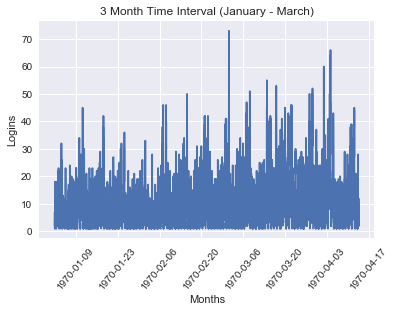

In [6]:
df_15T = df_15T.reset_index()
x = df_15T['login_time']
y = df_15T['count']
plt.plot(x, y)
plt.title('3 Month Time Interval (January - March)')
plt.xticks(rotation = 50)
plt.xlabel("Months")
plt.ylabel("Logins")
plt.show()

In [7]:
df = df.reset_index()

In [8]:
df['date'] = df['login_time'].apply(lambda d: dt.date(d.year, d.month, d.day))
df['hour'] = df['login_time'].apply(lambda d: d.hour)
df['weekday'] = df['login_time'].apply(lambda d: d.weekday())

In [9]:
df.head()

,login_time,count,date,hour,weekday
0,1970-01-01 20:13:18,1,1970-01-01,20,3
1,1970-01-01 20:16:10,1,1970-01-01,20,3
2,1970-01-01 20:16:37,1,1970-01-01,20,3
3,1970-01-01 20:16:36,1,1970-01-01,20,3
4,1970-01-01 20:26:21,1,1970-01-01,20,3


In [10]:
by_date = df['date'].value_counts().sort_index()
by_date = by_date.reset_index()
by_date.head()

,index,date
0,1970-01-01,112
1,1970-01-02,681
2,1970-01-03,793
3,1970-01-04,788
4,1970-01-05,459


# Graph 15min Interval VS Day Intervals

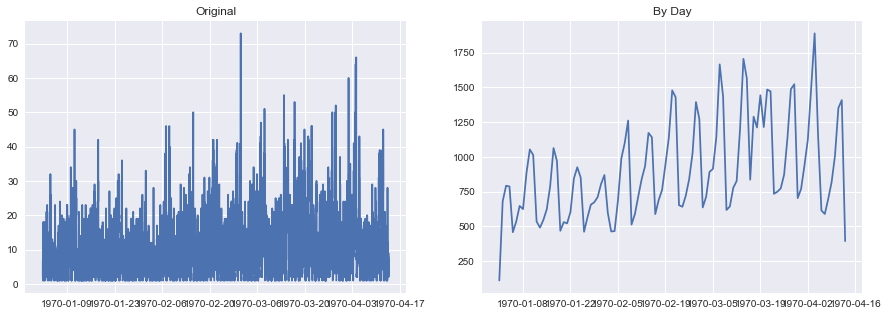

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5));
axes[0].plot('login_time', 'count', data = df_15T);
axes[0].set_title('Original');
axes[1].plot('index', 'date', data = by_date);
axes[1].set_title('By Day');

plt.show()

# Graph Rolling Sum By Week

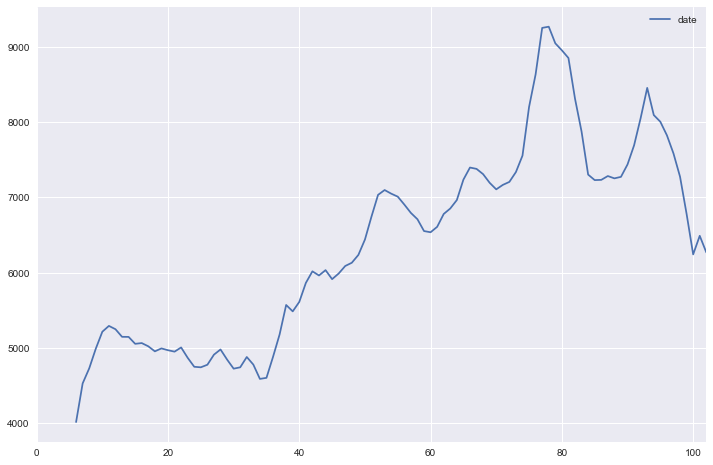

In [12]:
fig, ax = plt.subplots(1)
by_date.rolling(7).sum().plot(ax=ax)
fig.set_size_inches(12, 8)
plt.show()

# Monthly Logins
*** 
**Summary:**

- It looks like March has the most logins for the month, followed by February, and then January.
- The Months all have similar distribution of logins
- Let's look into days of the week distribution of logins

In [13]:
df_months = df_15T.groupby(df_15T['login_time'].dt.strftime('%B'))['count'].sum().sort_values()

In [14]:
df_months.head()

login_time
April       13507.0
January     21239.0
February    24673.0
March       33723.0
Name: count, dtype: float64

## January Logins
***

In [15]:
january = df_15T[(df_15T['login_time'] > '1970-01') & (df_15T['login_time'] < '1970-02')]
january.describe()

,count
count,2757.000000
mean,7.703663
std,6.019589
min,1.000000
25%,3.000000
50%,6.000000
75%,11.000000
max,45.000000


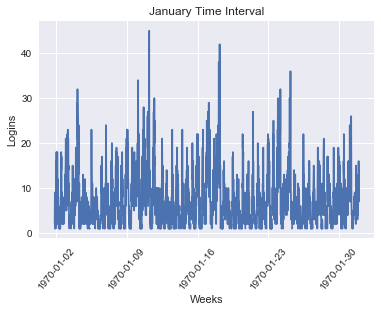

In [16]:
# Plot January Logins
x = january['login_time']
y = january['count']
plt.plot(x, y)
plt.title('January Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")
plt.show()

## February Logins
***

In [17]:
february = df_15T[(df_15T['login_time'] > '1970-02') & (df_15T['login_time'] < '1970-03')]
february.describe()

,count
count,2561.000000
mean,9.629442
std,7.710417
min,1.000000
25%,4.000000
50%,8.000000
75%,13.000000
max,50.000000


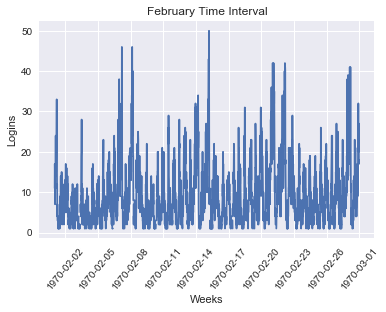

In [18]:
# Plot February Logins
x = february['login_time']
y = february['count']
plt.plot(x, y)
plt.title('February Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")
plt.show()

## March Logins
***

In [19]:
march = df_15T[(df_15T['login_time'] > '1970-03') & (df_15T['login_time'] < '1970-04')]
march.describe()

,count
count,2869.000000
mean,11.748693
std,9.245637
min,1.000000
25%,5.000000
50%,9.000000
75%,16.000000
max,73.000000


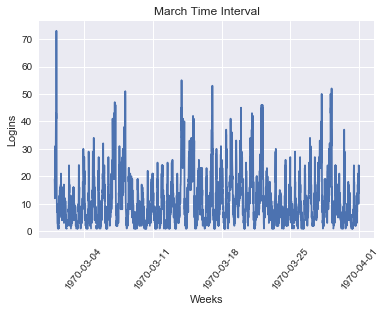

In [20]:
# Plot February Logins
x = march['login_time']
y = march['count']
plt.plot(x, y)
plt.title('March Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")
plt.show()

## April Login
***

In [21]:
april = df_15T[(df_15T['login_time'] > '1970-04') ]
april.describe()

,count
count,1191.000000
mean,11.328296
std,9.935110
min,1.000000
25%,4.000000
50%,9.000000
75%,15.000000
max,66.000000


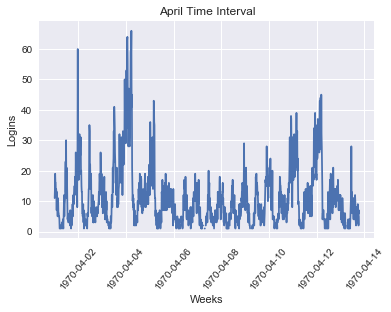

In [22]:
# Plot April Logins
x = april['login_time']
y = april['count']
plt.plot(x, y)
plt.title('April Time Interval')
plt.xticks(rotation = 50)
plt.xlabel("Weeks")
plt.ylabel("Logins")

plt.show()

# Daily Logins (Monday-Sunday)
***
**Summary:**

- It looks like the distribution of logins are increasing as the days go by. 
- Saturday has the highest amount of logins
- Weekends display the most logins


In [23]:
#Reset index first
# df_15T.reset_index(inplace=True)

# Counting based on weekdays, 0 = Monday, 6 = Sunday
df_15T['weekday'] = df_15T['login_time'].dt.dayofweek
df_weekday = df_15T.sort_values(by='count', ascending=False)
weekday_counts = df_weekday[['count', 'weekday']]
weekday_counts = weekday_counts.groupby('weekday').sum().reset_index()
weekday_counts

,weekday,count
0,0,8823.0
1,1,9268.0
2,2,10339.0
3,3,11960.0
4,4,15208.0
5,5,19377.0
6,6,18167.0


In [24]:
weekday_counts['weekday'] = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
weekday_counts = weekday_counts[['weekday','count']]
weekday_counts

,weekday,count
0,Mon,8823.0
1,Tues,9268.0
2,Wed,10339.0
3,Thurs,11960.0
4,Fri,15208.0
5,Sat,19377.0
6,Sun,18167.0


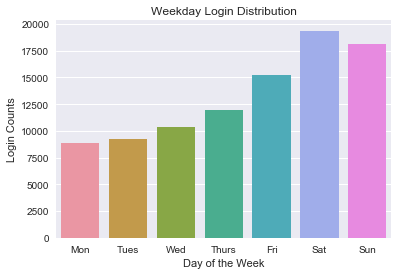

In [25]:
sns.barplot(x= 'weekday', y='count', data=weekday_counts)
plt.xlabel('Day of the Week')
plt.title('Weekday Login Distribution')
plt.ylabel('Login Counts')
plt.show()

In [26]:
#Reset index first
#df_15T.reset_index(inplace=True)

# Counting based on weekdays, 0 = Monday, 6 = Sunday
df_15T['hour'] = df_15T['login_time'].dt.hour
df_hour = df_15T.sort_values(by='count', ascending=False)
hour_counts = df_hour[['count', 'hour']]
hour_counts = df_hour.groupby('hour').sum().reset_index()
hour_counts

,hour,count,weekday
0,0,5993.0,1236
1,1,6317.0,1236
2,2,5800.0,1236
3,3,4831.0,1236
4,4,5034.0,1236
5,5,2945.0,1236
6,6,1138.0,1236
7,7,815.0,1236
8,8,818.0,1236
9,9,1527.0,1236


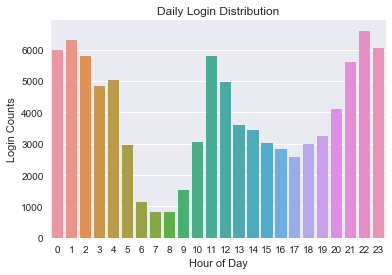

In [27]:
sns.barplot(x= 'hour', y='count', data=hour_counts)
plt.xlabel('Hour of Day')
plt.title('Daily Login Distribution')
plt.ylabel('Login Counts')
plt.show()

# Part 2 - Experiment and metrics design
*** 

The neighboring cities of **Gotham and Metropolis** have complementary circadian rhythms: on weekdays, **Ultimate Gotham is most active at night** and **Ultimate Metropolis is most active during the day**. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two-way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities by reimbursing all toll costs. 

**Question 1:** What woud you choose as the key measure of success of this experiment in encouraging driver partners to server both cities, and why would you choose this metric?

**Question 2:** Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
- a. How you will implement the experiment
- b. What statistical test(s) you will conduct to verify the significance of the observation
- c. How would you interpret the results and provide recommendations to the city operations team along with any caveats. 

**Answer 1:** 

The most obvious metric for success will be **profit**, but other metrics include:
- Positive User Feedback 
- More traffic in cities, which may lead to indirect profit of neighboring stores or restaraunts
- Increase signups and registration of users
- Less wait times

There's many reasons to choose a metric, and it ultimately comes down to what the city needs. I believe that creating these tolls roads will hopefully increase the awareness about the benefits of driver partners. The goal is to save time and increase productivity

**Answer 2:** 

One simple experiment that we can perform is to conduct an A/B Test. The control group would be users that do not use the toll bridge. And the test group would be users that do use the toll bridge. We'll have to keep track of the revenue gained from both sides and compare it against each other within a few months. Or if you want a more accurate reading, we can collect the data within a year's time. 

A statistical test that we can use is applying a t-test, with a p-value of (0.5). 

There's three ways to interpret the results. One would be if there's no increase in profit. If this happens, then we'll need to conduct more studies and see what's causing the problem. If there is no increase in profit, then we'll have to wait it out and see what else can be done. If there is profit, then we can look at what factors contributed the most to an increase in profit and maybe optimize from there. 

In the end, it'll be hard to evaluate the performance of this experiment within a short period of time. This experiment will have to be monitored for a while and adjustments will have to be made yearly or periodically at the least.

# Part 3 - Predictive Modeling
***

Ultimate     is     interested     in     predicting     rider     retention.    To    help    explore     this    question,    we    have  provided     a     sample    dataset     of     a     cohort    of    users    who     signed    up     for    an    Ultimate    account     in 
January    2014.    The     data    was    pulled     several    months     later;    we     consider    a    user     retained     if     they  were     “active”     (i.e.     took    a     trip)     in     the     preceding    30    days.    We     would     like     you     to    use     this    data     set     to    help    understand    what     factors    are     the    best    predictors  for     retention,    and    offer     suggestions     to     operationalize     those     insights     to    help    Ultimate.    The    data     is     in     the    attached     file     ultimate_data_challenge.json.    See    below     for    a    detailed  description     of     the    dataset.     Please     include    any     code     you    wrote     for     the    analysis    and    delete     the  dataset    when     you    have     finished     with     the     challenge. 

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). **What fraction of the observed users were retained?**

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. **How valid is your model?** Include any key indicators of model performance.

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term frider retention (again, a few sentences will suffice).

### Data Description

- **city**: city this user signed up in
- **phone**: primary device for this user
- **singup_date**: date of account registration; in the form 'YYYYMMDD'
- **last_trip_date**: the last time this user completed a trip; in the form 'YYYYMMDD'
- **avg_dist**: the average distance in miles per trip taken in the first 30 days after signup
- **avg_rating_by_driver**: the rider's average rating over all of their trips
- **avg_rating_of_driver**: the rider's average rating of their drivers over all of their trips 
- **surge_pct**: the percent of trips taken with surge multiplyer > 1
- **avg_surge**: The average surge multiplier over all of this users trips
- **trips_in_first_30_days:** the number of trips this user took in the first 30 days after signing up
- **ultimate_black_user**:TRUE if the user took an Ultimate Black in their first 30 days. FALSE otherwise
- **weekday_pct:** the percent of the user's trip occurring during a weekday

## Read JSON File

In [28]:
# Import json and read data into dataframe
import json

file = open('ultimate_data_challenge.json', 'r')
df = pd.DataFrame(json.load(file))
file.close()


**Types of Variables:**
- Numerical Variables: 7
- Categorical Variables: 3
- Ordinal Date Variables: 2

In [29]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


## Exploratory Data Analysis 

In [30]:
df.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
weekday_pct               float64
dtype: object

In [31]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


### Check missing values

- avg_rating_by_driver
- avg_rating_of_driver
- phone 

In [32]:
df.count()

avg_dist                  50000
avg_rating_by_driver      49799
avg_rating_of_driver      41878
avg_surge                 50000
city                      50000
last_trip_date            50000
phone                     49604
signup_date               50000
surge_pct                 50000
trips_in_first_30_days    50000
ultimate_black_user       50000
weekday_pct               50000
dtype: int64

### Convert dates into datetime objects

In [33]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [34]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

### Check the last date and create the label 'active_30'

The last date in the dataset is July 1, 2014. So we can create a label for active users that fall within June 1 - July 1

In [35]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [36]:
# Create a new column and set its values to nan
df['active_30'] = 'nan'

In [37]:
# Active users will have a value of 1 if they were active within the past 30 days
df.loc[df['last_trip_date'] >= "2014-06-01", "active_30"] = 1

In [38]:
# Inactive users otherwise
df.loc[df['last_trip_date'] < "2014-06-01", "active_30"] = 0

In [39]:
df.head(3)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30
0,3.67,5.0,4.7,1.1,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.0,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.0,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0


In [40]:
df['active_30'] = df['active_30'].convert_objects(convert_numeric=True)

C:\Users\Randy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


## Check proportion of active to inactive users

**Summary:**
- Looks like about **37.6%** of users are active in the dataset
- This can be seen as a class imbalance problem.
- The most correlated features associated with active users are **'trips_in_first_30_days'** and **'ultimate_black_user'**

In [42]:
df['active_30'].value_counts()

0    31196
1    18804
Name: active_30, dtype: int64

In [43]:
df['active_30'].value_counts() / len(df)

0    0.62392
1    0.37608
Name: active_30, dtype: float64

In [45]:
# Overview of summary (Active V.S. Non-Active)
turnover_Summary = df.groupby('active_30')
turnover_Summary.mean()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
active_30,,,,,,,,
0,6.207939,4.787464,4.607557,1.075339,8.666739,1.658482,0.299942,60.647032
1,5.114788,4.762772,4.592930,1.073809,9.152797,3.306318,0.505052,61.389034


## Correlation Matrix and Heatmap

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,active_30
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.092780
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442,-0.026791
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630,-0.011653
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.003333
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.011797
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388,0.210463
ultimate_black_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.205002
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.009693
active_30,-0.092780,-0.026791,-0.011653,-0.003333,0.011797,0.210463,0.205002,0.009693,1.000000


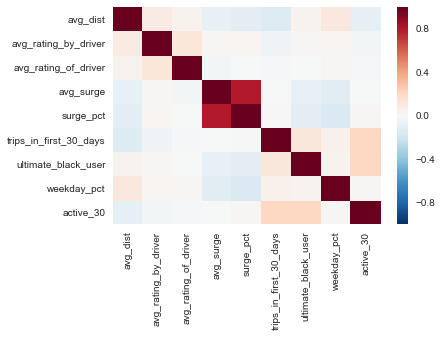

In [44]:
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

corr

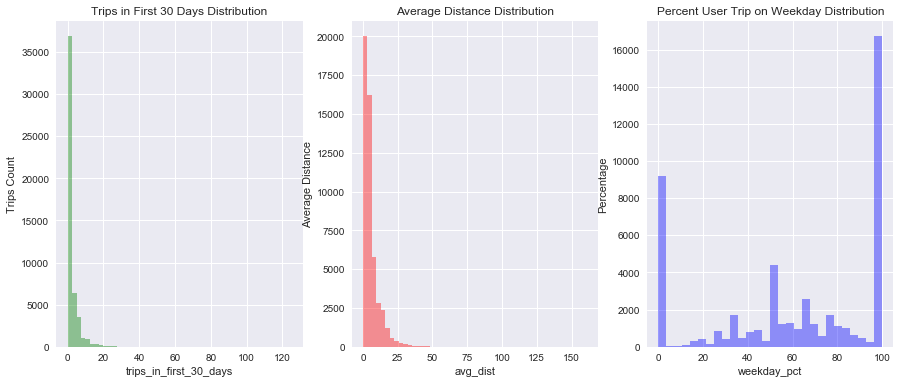

In [48]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df['trips_in_first_30_days'], kde=False, color="g", ax=axes[0]).set_title('Trips in First 30 Days Distribution')
axes[0].set_ylabel('Trips Count')

# Graph Employee Evaluation
sns.distplot(df['avg_dist'], kde=False, color="r", ax=axes[1]).set_title('Average Distance Distribution')
axes[1].set_ylabel('Average Distance')

# Graph Employee Average Monthly Hours
sns.distplot(df['weekday_pct'], kde=False, color="b", ax=axes[2]).set_title('Percent User Trip on Weekday Distribution')
axes[2].set_ylabel('Percentage')

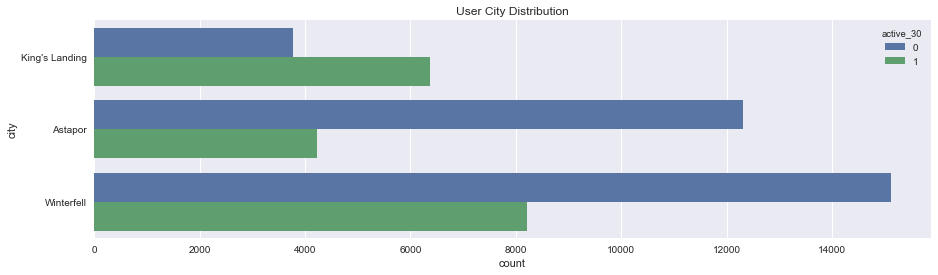

In [53]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="city", hue='active_30', data=df).set_title('User City Distribution');

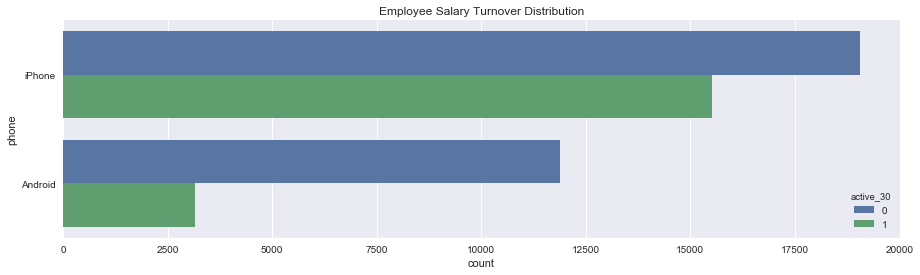

In [55]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="phone", hue='active_30', data=df).set_title('Employee Salary Turnover Distribution');

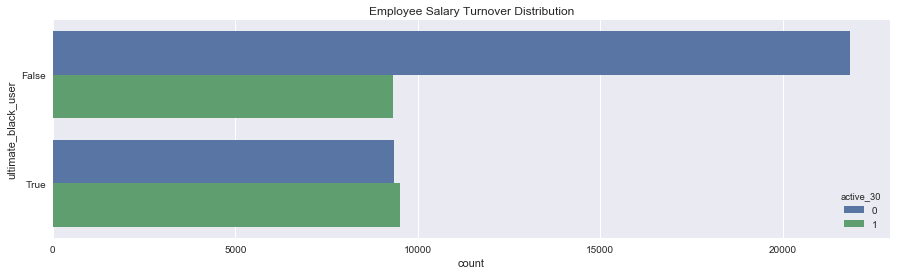

In [57]:
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="ultimate_black_user", hue='active_30', data=df).set_title('Employee Salary Turnover Distribution');

C:\Users\Randy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\Randy\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


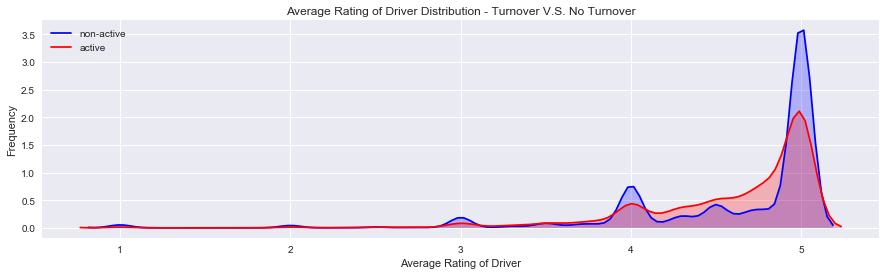

In [58]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['active_30'] == 0),'avg_rating_of_driver'] , color='b',shade=True,label='non-active')
ax=sns.kdeplot(df.loc[(df['active_30'] == 1),'avg_rating_of_driver'] , color='r',shade=True, label='active')
ax.set(xlabel='Average Rating of Driver', ylabel='Frequency')
plt.title('Average Rating of Driver Distribution - Turnover V.S. No Turnover')

## Pre-Processing 

**Pre-Processing Requirements:**
- Convert Categorical Variables Accordingly (city, phone, ultimate_black_user)
- Scale all numerical features?